<a href="https://colab.research.google.com/github/leesa9596/practice/blob/main/deeplearning_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

-------

1


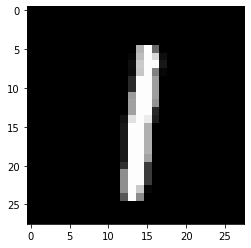

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline 


index = 40 
img = x_train[index]
print(y_train[index])
plt.imshow(img,cmap='gray')

-------

In [ ]:
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

In [ ]:
x_train /= 255
x_test /= 255

In [ ]:
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)


In [ ]:
y_train[0]

5

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10) # convert class vector to binary class matirx
y_test = to_categorical(y_test, 10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

---------

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten


In [ ]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(16, 'relu'))
    model.add(Dense(units=10, activation='softmax'))

    return model

In [ ]:
model_f = create_model()

In [ ]:
model_f.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_f.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
             metrics = ['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 5/6)

In [ ]:
history = model_f.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=5)

Epoch 1/5
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3565 - accuracy: 0.8967 - val_loss: 0.2083 - val_accuracy: 0.9404
Epoch 2/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1622 - accuracy: 0.9523 - val_loss: 0.1593 - val_accuracy: 0.9544
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1183 - accuracy: 0.9656 - val_loss: 0.1345 - val_accuracy: 0.9611
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0934 - accuracy: 0.9721 - val_loss: 0.1247 - val_accuracy: 0.9659
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0765 - accuracy: 0.9767 - val_loss: 0.1291 - val_accuracy: 0.9649


In [ ]:
vars(history) 

{'_chief_worker_only': None,
 '_supports_tf_logs': False,
 'epoch': [0, 1, 2, 3, 4],
 'history': {'accuracy': [0.8967400193214417,
   0.9523199796676636,
   0.9655799865722656,
   0.9720799922943115,
   0.9767400026321411],
  'loss': [0.3565008342266083,
   0.1622157245874405,
   0.11828377842903137,
   0.09340257942676544,
   0.07649059593677521],
  'val_accuracy': [0.9404000043869019,
   0.9544000029563904,
   0.9610999822616577,
   0.9659000039100647,
   0.964900016784668],
  'val_loss': [0.20830407738685608,
   0.15933001041412354,
   0.13449233770370483,
   0.12473922967910767,
   0.1290828287601471]},
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7feff2173550>,
 'params': {'epochs': 5, 'steps': 1563, 'verbose': 1},
 'validation_data': None}

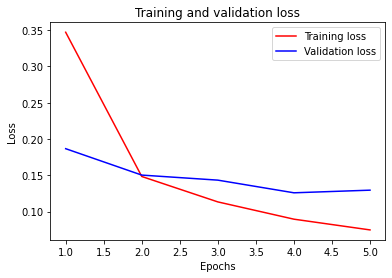

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()      
plt.show()

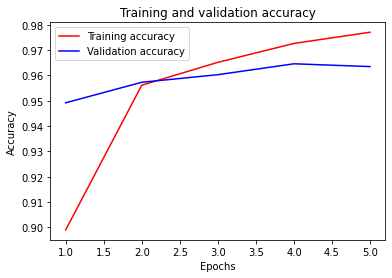

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
loss_and_metrics = model_f.evaluate(x_test, y_test, verbose=0)

In [ ]:
print('\n')
print('test_loss: ' + str(loss_and_metrics[0]))
print('test_accuracy: ' + str(loss_and_metrics[1]*100) + '%')



test_loss: 0.11394961923360825
test_accuracy: 96.67999744415283%
